## <font color="#CA3532">Neural interpretation</font>

In the previous sessions we studied two simple parametric models of supervised learning:

- Linear regression.
- Logistic regression.

We will see now that both models can be seen as neural networks of one single neuron. 

An **artificial neural network** is a machine learning model consisting of a set of processing units called **neurons** interconnected in such a way that the outputs of some neurons constitute the inputs of other neurons. The final model is an abstraction of real neural circuits in animal brains. 

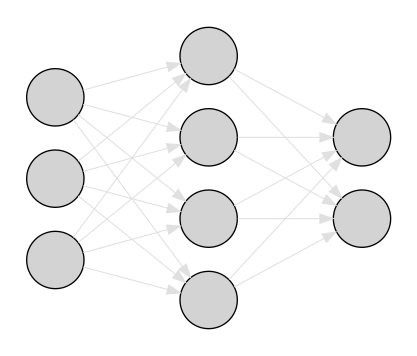

In the following sections we review the biological neuron, introduce the artificial neuron and relate it to the linear and logistic regression models. In the last part we show how linear models can be used to solve non linear problems.


## <font color="#CA3532">The biological neuron</font>

The biological neuron is a specialized cell that is able to communicate with other neurons using electric signals. Neurons are the main components of the animal nervous system. 

In a very simplified picture a neuron has three main elements:

- The **dendrites**, which are extensions of the cell body through which the neuron receives its inputs. 
- The **soma** or cell body, which accumulates all the dendritic input and *computes* the neuron's output, an electric signal that may be propagated to other neurons. 
- The **axon**, a long projection of the cell body that connects to the dendrites of other neurons in specific structures called **synapses**. 

The electric signal generated in response to the neuron's input is propagated along the axon and transmitted to other neurons via the synaptic connections. 


## <font color="#CA3532">The artificial neuron</font>

The artificial neuron is an abstract model of the biological neuron where:

- The neuron's input is a $d$-dimensional vector of real numbers that represent each of the dendritic inputs: ${\bf x} = (x_{1}, x_{2}, ..., x_{d})^{t}$.
- The neuron computes its output by first evaluating a weighted sum of all its inputs, usually called the **pre-activation**:  

$$z = \sum_{i=1}^{d}w_{i}x_{i} + b,\tag{1}$$

- The weight vector ${\bf w} = (w_{1}, w_{2}, ..., w_{d})^{t}$ represents the strengths of the synaptic connections associated to each of the neuron's inputs. The parameter $b$ is a special weight called the **bias**, which may be thought to be associated to a constant input of value $1$. 
- The preactivation is passed through a non-linear function called the **activation function** to obtain the final neuron's output, or neuron's **activation**:

$$y = f(z).\tag{2}$$

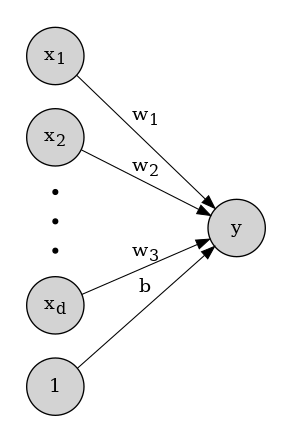

We may rewrite the summatory in equation $(1)$ as the dot product of the weight and input vectors to obtain a more compact expression for the neuron's activation:

$$y = f({\bf w}^{t} {\bf x} + b).\tag{3}$$

It turns out that:

- When the activation is the identity function our model neuron is equivalent to the linear regression model.

- When the activation is the sigmoid function our model neuron is equivalent to the logistic regression model.


## <font color="#CA3532">Solving non-linear problems</font>

Sooner or later we will face a non-linear problem. For example let us consider a regression problem with 100 data $(x_{i}, t_{i})$, where $x_{i} \in [-1, 1]$ and $t_{i}$ is normally distributed around $4x_{i}^{2} - x_{i} + 1$.

The following code generates a random sample with these properties.

In [23]:
import numpy as np

# Parameters:
xmin = -1.0
xmax = 1.0
noise = 0.4
n = 100

# Randomly generated problem data:
x = xmin + np.random.rand(1, n)*(xmax - xmin)
t = 4*x**2 - x + 1 + np.random.randn(n)*noise

And the following code shows how the data are distributed in the plane $(x, t)$, together with the model (without noise) used to generate the data. 

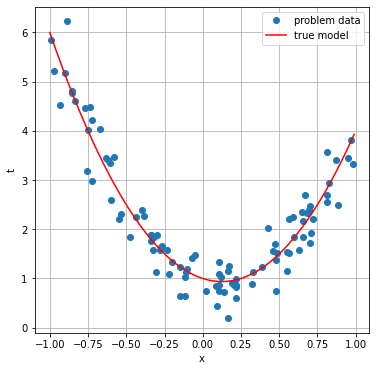

In [24]:
import matplotlib.pyplot as plt

xrange = np.arange(xmin, xmax, 0.01)[None, :]
ytrue = 4*xrange**2 - xrange + 1

plt.figure(figsize=(6, 6))
plt.plot(x[0], t[0], 'o', label="problem data")
plt.plot(xrange[0], ytrue[0], 'r-', label="true model")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

It is clear that a linear model will not provide a good estimation of $t$ given $x$. 

When facing a non-linear regression problem like the former, we may try two different approaches:

1. The complex way is to fit a non-linear model to our data. 

2. The easy way is to transform the attribute vector ${\bf x} = (x_{1}, x_{2}, ..., x_{d})^{t}$ into a new set of attributes $\boldsymbol{\phi} ({\bf x}) = (\phi_{1}({\bf x}),\phi_{2}({\bf x}),...,\phi_{m}({\bf x}))^{t}$ and keep the linear approach. 

When we follow the second approach, we make a (fixed) non-linear transformation of the attribute space, $\boldsymbol{\phi}({\bf x})$, with the hope that the non-linearity of the problem is captured by the new attributes, while the linearity of the model keeps things being simple.

The new model is then:

$$
y =  w_{1} \phi_{1}({\bf x}) + w_{2} \phi_{2}({\bf x}) + ... + w_{m} \phi_{m}({\bf x}) + b= {\bf w}^{t}  \boldsymbol{\phi} ({\bf x}) + b, \tag{4}
$$

which is linear in $\boldsymbol{\phi}({\bf x})$.

Going back to the example, we may select the following transformation:

$$
\boldsymbol{\phi} (x) = (x^{2}, x).\tag{5}
$$

The following code obtains the transformed attributes and trains a linear regression model on these attributes.

In [25]:
# Generate the transformed attributes:
phi = np.concatenate((x**2, x))
phi_range = np.concatenate((xrange**2, xrange))

# Standardize the attributes:
mean_phi = phi.mean(axis=1)[:, None]
std_phi = phi.std(axis=1)[:, None]
phi = (phi-mean_phi)/std_phi
phi_range = (phi_range-mean_phi)/std_phi

# Initialize model parameters:
w = np.random.randn(2, 1)
b = np.random.randn()

# Set number of iterations and learning rate:
num_iters = 100 
eta = 1.e-3      

# Train the model:
loss = []
for i in range(num_iters):
    y = np.dot(w.transpose(), phi) + b
    y_minus_t = y - t
    loss.append(np.dot(y_minus_t, y_minus_t.transpose().ravel()))

    dw = np.sum(y_minus_t*phi, axis=1)[:, None]
    db = np.sum(y_minus_t, axis=1)
    w -= eta*dw 
    b -= eta*db 

We can make a plot of the training loss versus the training iteration:

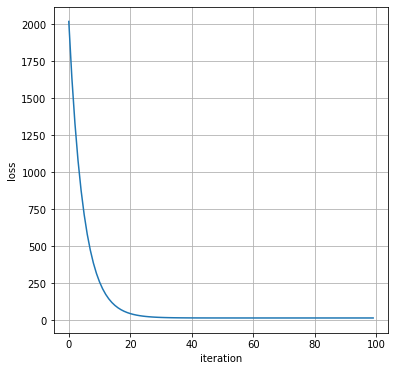

In [26]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.grid(True)
plt.show()

And we can plot the regression model over the training data:

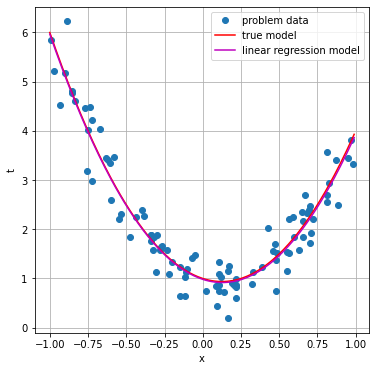

In [27]:
ymodel = np.dot(w.transpose(), phi_range) + b

plt.figure(figsize=(6, 6))
plt.plot(x[0], t[0], 'o', label='problem data')
plt.plot(xrange[0], ytrue[0], 'r-', label='true model')
plt.plot(xrange[0], ymodel[0], 'm-', label='linear regression model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

As we can observe, the linear regression model applied to the transformed data $\boldsymbol{\phi} (x)$ is able to provide a good estimation of $t$ given $x$.

## <font color="#CA3532">Some words about the model complexity</font>

If the model is too complex or we do not have enough training data (or both things) and we train for too many iterations we may overfit the data.

In the following code we force this situation by:

- Reducing the number of training instances to $10$.

- Increasing the complexity of the attribute transformation:

$$
\boldsymbol{\phi} (x) = (x^{20}, x^{19}, ..., x^{2}, x).\tag{6}
$$

- Increasing the number of training iterations.

Data generation:


In [28]:
n = 10

# Randomly generated problem data:
x = xmin + np.random.rand(1, n)*(xmax - xmin)
t = 4*x**2 - x + 1 + np.random.randn(n)*noise

Data visualization:

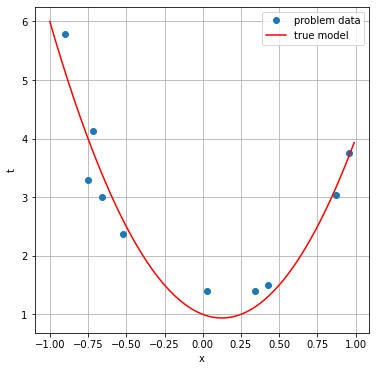

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(x[0], t[0], 'o', label="problem data")
plt.plot(xrange[0], ytrue[0], 'r-', label="true model")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

Model fitting:

In [38]:
# Generate the transformed attributes:
ndims = 20
phi = np.array([x[0]**i for i in range(ndims, 0, -1)])
phi_range = np.array([xrange[0]**i for i in range(ndims, 0, -1)])

# Standardize the attributes:
mean_phi = phi.mean(axis=1)[:, None]
std_phi = phi.std(axis=1)[:, None]
phi = (phi-mean_phi)/std_phi
phi_range = (phi_range-mean_phi)/std_phi

# Initialize model parameters:
w = np.random.randn(ndims, 1)
b = np.random.randn()

# Set number of iterations and learning rate:
num_iters = 1000000 
eta = 1.e-2   

# Train the model:
for i in range(num_iters):
    y = np.dot(w.transpose(), phi) + b
    y_minus_t = y - t
    dw = np.sum(y_minus_t*phi, axis=1)[:, None]
    db = np.sum(y_minus_t, axis=1)
    w -= eta*dw 
    b -= eta*db 

Results:

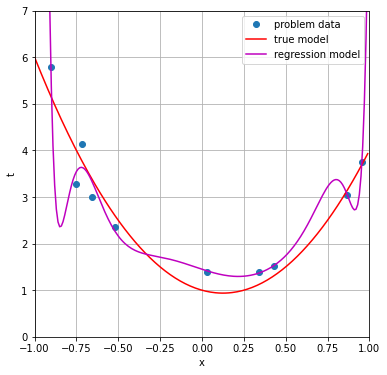

In [39]:
ymodel = np.dot(w.transpose(), phi_range) + b

plt.figure(figsize=(6, 6))
plt.plot(x[0], t[0], 'o', label='problem data')
plt.plot(xrange[0], ytrue[0], 'r-', label='true model')
plt.plot(xrange[0], ymodel[0], 'm-', label='regression model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.axis([-1, 1, 0, 7])
plt.show()

Note that an excesive complexity makes the model adapt too much to the training data. In this situation the model will not generalize well to new, unseen data. 

## <font color="#CA3532">A second example</font>

Let us consider now a classification problem in 2D, which we will try to solve using a logistic regression model. To build this model we will use the [TensorFlow Playground](https://playground.tensorflow.org/), an interactive  tool for the visualization of neural networks. 

In particular we will consider the *Circle* dataset, where one of the classes surrounds the other. We build a single neuron network with sigmoid activation function, which as we know is equivalent to a logistic regression model. As the model is linear and the problem is not, this model is not able to solve the problem.  




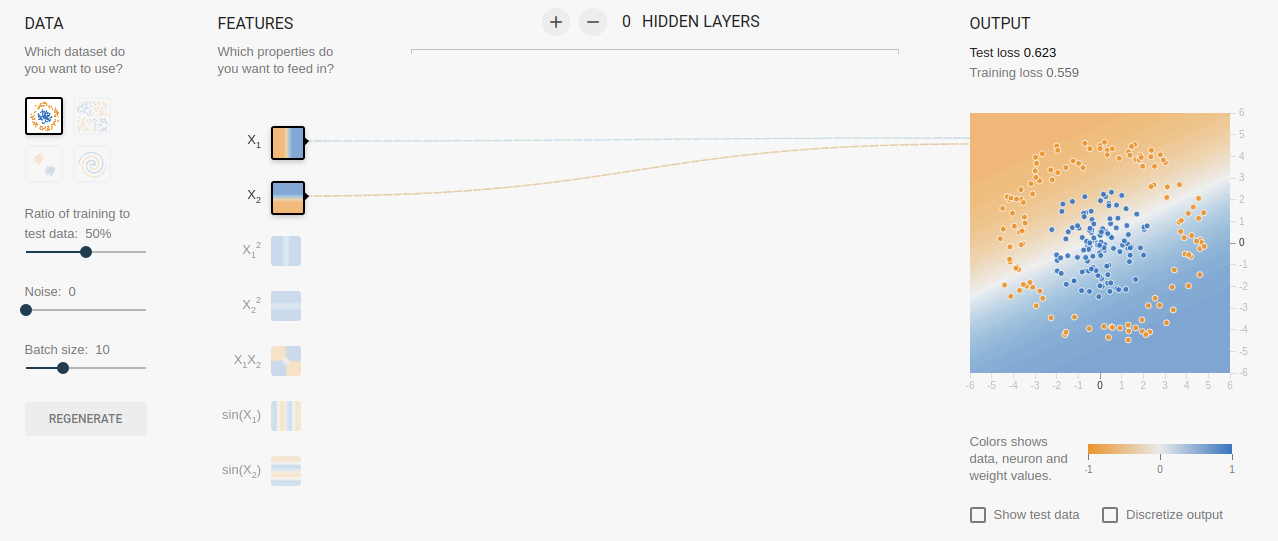

So the next step is to change the input representation by building a new attribute space. The tool lets us play with the following attributes: $\{x_{1}^{2}, x_{2}^{2}, x_{1}x_{2}, \sin{x_{1}}, \sin{x_{2}}\}$, and we will use the following transformation:

$$
\boldsymbol{\phi} (x_{1}, x_{2}) = (x_{1}^{2}, x_{2}^{2}).\tag{7}
$$

The model is then:

$$
y = \sigma(w_{1} x_{1}^{2} + w_{2} x_{2}^{2} + b).\tag{8}
$$

After training, the model is able to correctly predict the class labels:

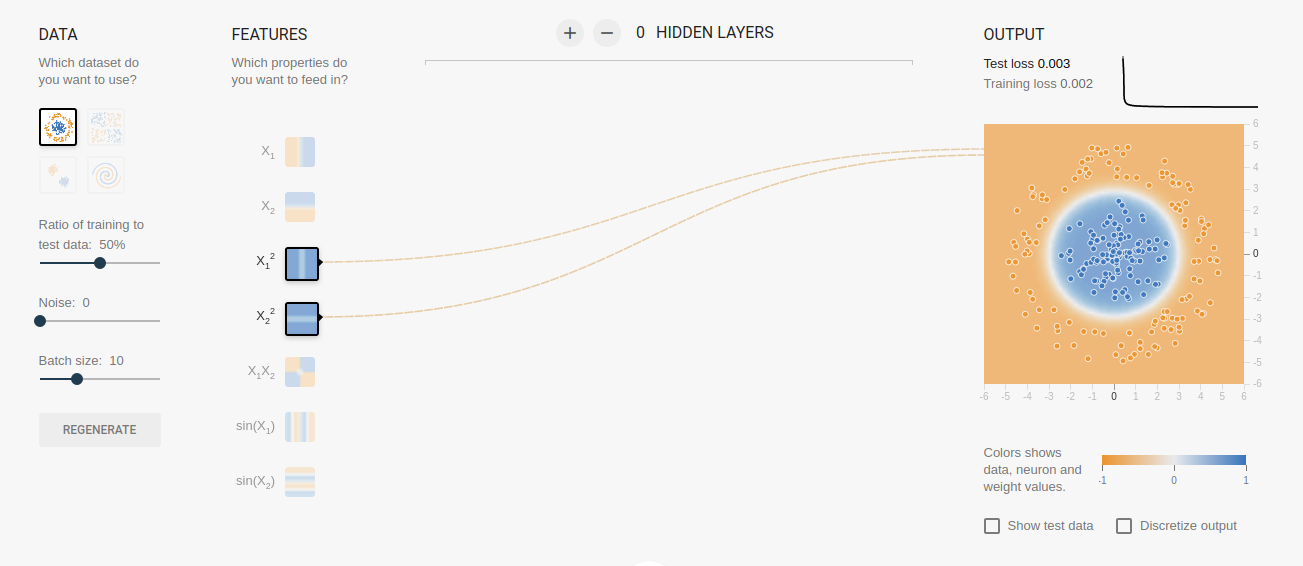

We have seen that a linear model on a suitable attribute space is able to solve problems that are non-linear in the original data representation. The problem is now how to find this *suitable* attribute space, and one possible solution is to let the model learn it.

## <font color="#CA3532">Let the model learn the representation</font>

The idea behind neural networks is to build a complex model by connecting many artificial neurons. The neurons are usually hierarchically organized in a set of layers, in such a way that all the neurons in a layer project to all the neurons in the next layer (this kind of architecture is called a **dense**, or **fully-connected**, **feed-forward** neural network).

The first layer always corresponds to the model input (the ${\bf x}$ vector), and the last layer is the model output $y$. Besides the network may have any number of intermediate or **hidden** layers. All the network neurons (with the exception of those in the input layer) behave as shown above: they compute a linear combination of their inputs followed by a non-linearity. 

As for the linear and logistic regression models, the network is trained to minimize a loss function that measures the difference between the network output $y$ and the expected target $t$. But now the set of trainable parameters involves the weights and biases of all the network's neurons. In this way, the neurons in the first hidden layer (those which are directly connected to the input) extract a new set of simple features that make the problem easier to solve by subsequent layers. The second hidden layer combines these features into more complex ones and so forth. Finally, the output neuron simply applies a linear model on the feature space represented by the last hidden layer. 

This way, instead of making feature engineering to find the most appropriate attributes for the problem, we are letting the neural network learn the optimal representation. In the previous example problem, let us consider again only the original variables $(x_{1}, x_{2})$ and introduce a new hidden layer with $5$ neurons. We observe that this new layer is able to learn a data representation that allows to solve the problem. 

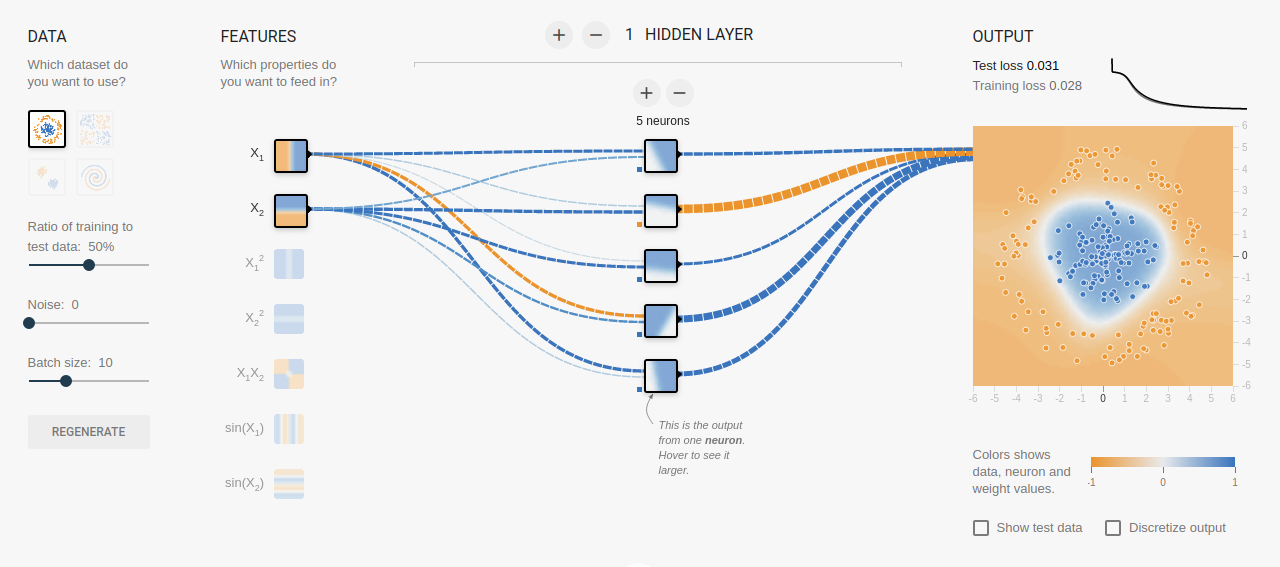